In [1]:
import numpy as np
import scipy as sp
from scipy.integrate import odeint
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

g=9.81
m= 70
h=32000

#a) use d= 0.5*a*t^2 -> t= sqrt(2d/a)
t1= np.sqrt(2*32000/g)
print('a) t='+str(int(np.around(t1)))+' s')

a) t=81 s


b) t=866 s


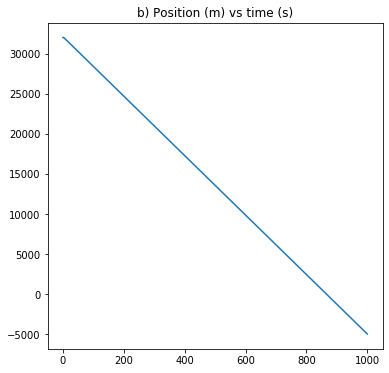

In [2]:
#b) Find new a, solve y''=cy'^2/m - g
# a= cv^2/m - g
m=70
def model(y,t):
    c=0.5
    g=9.81
    m=70
    y1=y[0]
    y2=y[1]
    dy1_dt=y2
    dy2_dt=c*y2**2/m-g
    dy_dt = [dy1_dt,dy2_dt]
    return dy_dt
t1= np.linspace(0,1000,4000)
sol = odeint(model,[32000,0],t1)
y= sol[:,0]
v= sol[:,1]

figure(1,figsize=(6,6))
plt.title('b) Position (m) vs time (s)')
plt.plot(t1,y)
# figure(2,figsize=(6,6))
# plt.title('Velocity (m/s) vs time (s)')
# plt.plot(t1,v)
#Need to find t where position (height) == 0
print('b) t='+str(int(np.around( t1[np.where(y<0.05)[0][0]])))+' s')

c) t=381 s
d) The acceleration becomes positive when the force of air resistance (first term 0.5*np.e**(-y/8000)*v**2/m) becomes greater than the force of gravity (-9.8/(1+v/6370000)**2)


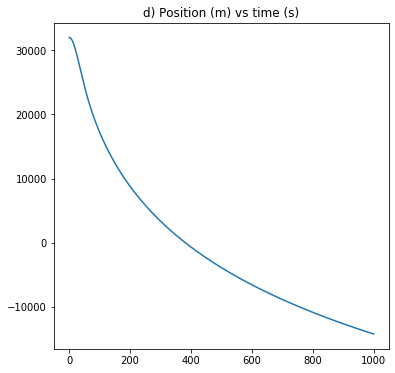

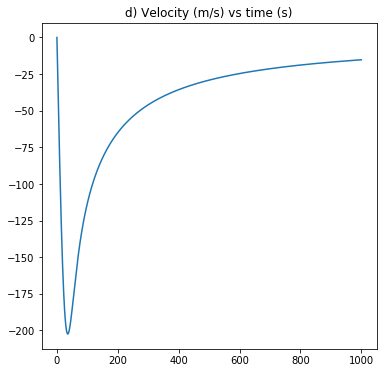

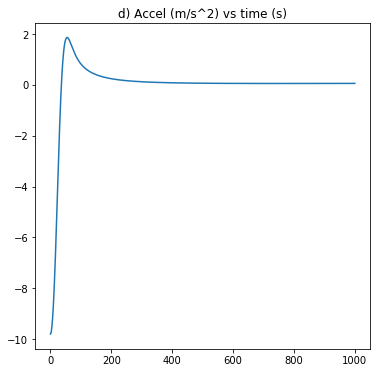

In [3]:
#c) similar to b
m=70
def model(y,t):
    m=70
    y1=y[0]
    y2=y[1]
    c=0.5*np.e**(-y1/8000)
    g=9.8/(1+y1/6370000)**2
    dy1_dt=y2
    dy2_dt=c*y2**2/m-g
    dy_dt = [dy1_dt,dy2_dt]
    return dy_dt
t1= np.linspace(0,1000,4000)
sol = odeint(model,[32000,0],t1)
y= sol[:,0]
v= sol[:,1]

figure(1,figsize=(6,6))
plt.title('d) Position (m) vs time (s)')
plt.plot(t1,y)
figure(2,figsize=(6,6))
plt.title('d) Velocity (m/s) vs time (s)')
plt.plot(t1,v)
#Need to find t where position (height) == 0
print('c) t='+str(int(np.around( t1[np.where(y<0.05)[0][0]]))) +' s')

# a given by c*v**2/m-g
a=0.5*np.e**(-y/8000)*v**2/m-9.8/(1+v/6370000)**2

figure(3,figsize=(6,6))
plt.title('d) Accel (m/s^2) vs time (s)')
plt.plot(t1,a)

print('d) The acceleration becomes positive when the force of air resistance (first term 0.5*np.e**(-y/8000)*v**2/m)'
      ' becomes greater than the force of gravity (-9.8/(1+v/6370000)**2)')